In [1]:
# Cargar a la memoria de trabajo las bibliotecas: Pandas (manejo de datos, 
# Numpy (numerical python) y la biblioteca de gráficas Matplotlib
# Se asignan nombres cortos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#
# Usar "Shift+Enter" para procesar la información de la celda
#

In [2]:
# Descarga los datos de una estación del Servicio Meteorológico Nacional
# http://smn1.conagua.gob.mx/emas/
# Lee un archivo de texto con la función Pandas "read_csv", con elementos separados por mas de 
# un espacio, brincándose 4 renglones del inicio (encabezados)
df0 = pd.read_csv('chinipas.txt', skiprows=4, sep='\s+')
# "Shift + Enter"

In [3]:
# Lee los primeros 5 renglones del archivo
df0.head()
# "Shift+Enter"

,DD/MM/AAAA,HH:MM,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
0,25/01/2018,23:00,153,110,9.69,27.2,28.0,3,963.6,0.0,302.3
1,26/01/2018,00:00,244,191,3.94,12.8,24.3,9,964.2,0.0,25.7
2,26/01/2018,01:00,186,259,0.27,4.2,19.9,18,964.7,0.0,0.0
3,26/01/2018,02:00,103,117,0.48,4.3,15.6,24,965.2,0.0,0.0
4,26/01/2018,03:00,294,275,0.21,4.4,12.5,32,965.9,0.0,0.0


In [4]:
# Dar estructura de datos (DataFrame)
df = pd.DataFrame(df0)

In [5]:
# Ver los tipos de datos que Pandas ha reconocido al leer
df.dtypes

DD/MM/AAAA     object
HH:MM          object
DIRS            int64
DIRR            int64
VELS          float64
VELR          float64
TEMP          float64
HR              int64
PB            float64
PREC          float64
RADSOL        float64
dtype: object

In [6]:
# Combinar las columnas "DD/MM/AAAA" con "HH:MM" y convertirla a variable de tiempo
# Se crea una nueva columna "Fecha" al final con formato de tiempo.
# Eliminamos las dos primeras columnas que ya no necesitaremos
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/AAAA'] + ' ' + x['HH:MM'], 1), dayfirst=True)
df = df.drop(['DD/MM/AAAA', 'HH:MM'], 1)

In [7]:
df.head()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
0,153,110,9.69,27.2,28.0,3,963.6,0.0,302.3,2018-01-25 23:00:00
1,244,191,3.94,12.8,24.3,9,964.2,0.0,25.7,2018-01-26 00:00:00
2,186,259,0.27,4.2,19.9,18,964.7,0.0,0.0,2018-01-26 01:00:00
3,103,117,0.48,4.3,15.6,24,965.2,0.0,0.0,2018-01-26 02:00:00
4,294,275,0.21,4.4,12.5,32,965.9,0.0,0.0,2018-01-26 03:00:00


In [8]:
# Realiza un análisis exploratorio de datos
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.0,166.000000
mean,202.475904,191.614458,2.149578,7.766867,17.034337,34.289157,965.470482,0.0,187.823494
std,74.447680,79.155134,2.501353,5.354334,9.087679,17.740233,2.453106,0.0,273.857529
min,0.000000,27.000000,0.000000,0.000000,0.600000,3.000000,960.500000,0.0,0.000000
25%,154.000000,114.500000,0.512500,4.300000,9.425000,16.000000,963.800000,0.0,0.000000
50%,212.000000,203.000000,1.140000,6.100000,15.900000,36.000000,965.450000,0.0,0.000000
75%,249.500000,247.750000,2.865000,8.975000,25.200000,51.000000,967.400000,0.0,394.500000
max,353.000000,350.000000,14.350000,30.600000,33.500000,65.000000,970.800000,0.0,792.500000


In [9]:
# Selecciona los renglones con Temperatura > 24ºC y < 25ºC
df_tmp = df[df.TEMP > 24] 
df_select = df_tmp[df_tmp.TEMP < 25]
df_select

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
1,244,191,3.94,12.8,24.3,9,964.2,0.0,25.7,2018-01-26 00:00:00
25,219,232,3.72,12.3,24.8,13,963.3,0.0,28.5,2018-01-27 00:00:00
100,177,256,2.14,11.9,24.2,18,966.4,0.0,0.0,2018-01-30 03:00:00
139,219,221,3.41,7.1,24.5,22,965.1,0.0,672.0,2018-01-31 18:00:00
148,141,81,4.95,22.1,24.3,26,963.7,0.0,0.0,2018-02-01 03:00:00


In [10]:
# Calcula el promedio de las columnas, excepto en la FECHA (que no tendría sentido)
df.mean()

DIRS      202.475904
DIRR      191.614458
VELS        2.149578
VELR        7.766867
TEMP       17.034337
HR         34.289157
PB        965.470482
PREC        0.000000
RADSOL    187.823494
dtype: float64

In [11]:
# Calcula el promedio de las Temperaturas
df.TEMP.mean()

17.03433734939759

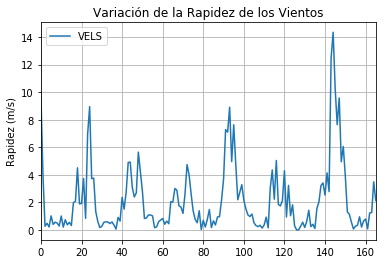

In [12]:
# Gráfica de la rapidez de los vientos (m/s) 
plt.figure(); df.VELS.plot(); plt.legend(loc='best')
plt.title("Variación de la Rapidez de los Vientos")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

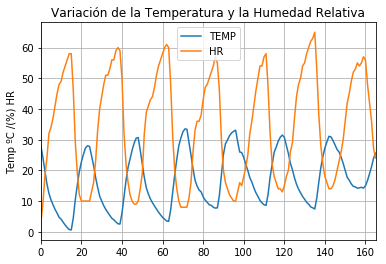

In [13]:
# Gráfica de Temperatura y Humedad Relativa
df1 = df[['TEMP','HR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variación de la Temperatura y la Humedad Relativa")
plt.ylabel("Temp ºC /(%) HR")
plt.grid(True)
plt.show()

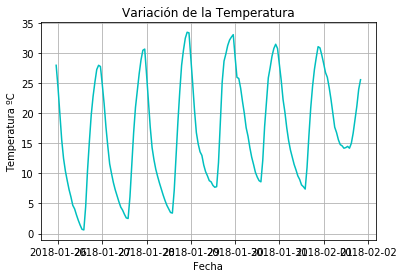

In [14]:
#Gráfica de Variación de Temperatura
df1 = df[['TEMP']]
plt.plot_date(x=df.FECHA, y=df.TEMP, fmt="c-")
plt.title("Variación de la Temperatura")
plt.ylabel("Temperatura ºC")
plt.xlabel("Fecha")
plt.grid(True)
plt.show()

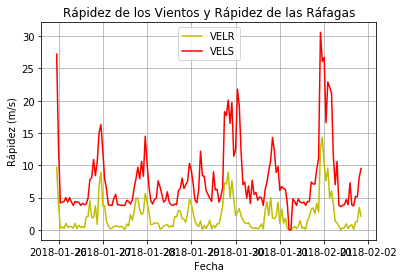

In [15]:
#Gráfica de Rápidez de los Vientos y Rápidez de las Ráfagas
df1 = df[['VELS','VELR']]
plt.plot_date(x=df.FECHA, y=df.VELS, fmt="y-")
plt.plot_date(x=df.FECHA, y=df.VELR, fmt="r-")
plt.legend( ('VELR', 'VELS'))
plt.title("Rápidez de los Vientos y Rápidez de las Ráfagas")
plt.ylabel("Rápidez (m/s)")
plt.xlabel("Fecha")
plt.grid(True)
plt.show()

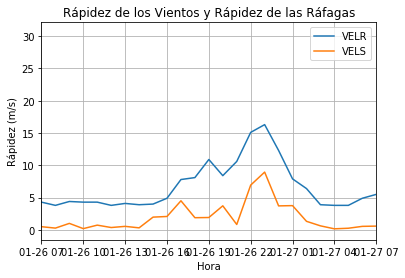

In [16]:
#Gráfica de Rápidez de los Vientos y Rápidez de las Ráfagas
y = df[['VELR','VELS']]
x = df['FECHA']
plt.plot(x,y)
plt.legend( ('VELR', 'VELS'))
plt.xlim(['2018-01-26 07:00:00','2018-01-27 07:00:00'])
plt.title("Rápidez de los Vientos y Rápidez de las Ráfagas")
plt.ylabel("Rápidez (m/s)")
plt.xlabel("Hora")
plt.legend()
plt.grid(True)
plt.show()

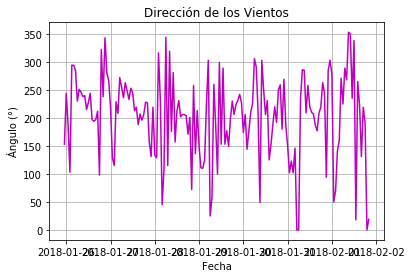

In [17]:
# Gráfica de la dirección de los vientos 
plt.plot_date(x=df.FECHA, y=df.DIRS, fmt="m-")
plt.title("Dirección de los Vientos")
plt.ylabel("Ángulo (°)")
plt.xlabel("Fecha")
plt.grid(True)
plt.show()


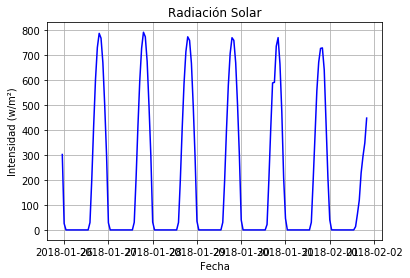

In [18]:
# Gráfica del comportamiento de la radiación solar
plt.plot_date(x=df.FECHA, y=df.RADSOL, fmt="b-")
plt.title("Radiación Solar")
plt.ylabel("Intensidad (w/m²)")
plt.xlabel("Fecha")
plt.grid(True)
plt.show()

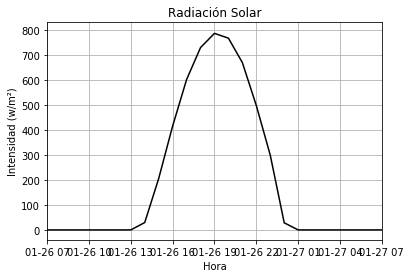

In [19]:
# Gráfica del comportamiento de la radiación solar
plt.plot_date(x=df.FECHA, y=df.RADSOL, fmt="k-")
plt.title("Radiación Solar")
plt.xlim(['2018-01-26 07:00:00','2018-01-27 07:00:00'])
plt.ylabel("Intensidad (w/m²)")
plt.xlabel("Hora")
plt.grid(True)
plt.show()

In [20]:
df2 = df.loc[2:24,['TEMP','FECHA']]

In [21]:
df2

,TEMP,FECHA
2,19.9,2018-01-26 01:00:00
3,15.6,2018-01-26 02:00:00
4,12.5,2018-01-26 03:00:00
5,10.4,2018-01-26 04:00:00
6,8.8,2018-01-26 05:00:00
7,7.3,2018-01-26 06:00:00
8,6.1,2018-01-26 07:00:00
9,4.7,2018-01-26 08:00:00
10,4.1,2018-01-26 09:00:00
11,3.1,2018-01-26 10:00:00


In [22]:
tmin = df2.min()

In [23]:
tmax = df2.max()

In [24]:
tmax - tmin

TEMP                27.4
FECHA    0 days 22:00:00
dtype: object

In [25]:
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.0,166.000000
mean,202.475904,191.614458,2.149578,7.766867,17.034337,34.289157,965.470482,0.0,187.823494
std,74.447680,79.155134,2.501353,5.354334,9.087679,17.740233,2.453106,0.0,273.857529
min,0.000000,27.000000,0.000000,0.000000,0.600000,3.000000,960.500000,0.0,0.000000
25%,154.000000,114.500000,0.512500,4.300000,9.425000,16.000000,963.800000,0.0,0.000000
50%,212.000000,203.000000,1.140000,6.100000,15.900000,36.000000,965.450000,0.0,0.000000
75%,249.500000,247.750000,2.865000,8.975000,25.200000,51.000000,967.400000,0.0,394.500000
max,353.000000,350.000000,14.350000,30.600000,33.500000,65.000000,970.800000,0.0,792.500000
